In [1]:
library(rpart)
library(rpart.plot)

## P1

#### Distribution with (5,2) and (-5,2)

In [30]:
feat1 <- rnorm(1000, 5, 2)
feat2 <- rnorm(1000, -5, 2)
label <- c(rep('Y', 500), rep('N', 500))
bin.data <- data.frame(feat1 = feat1, feat2 = feat2, class=label)

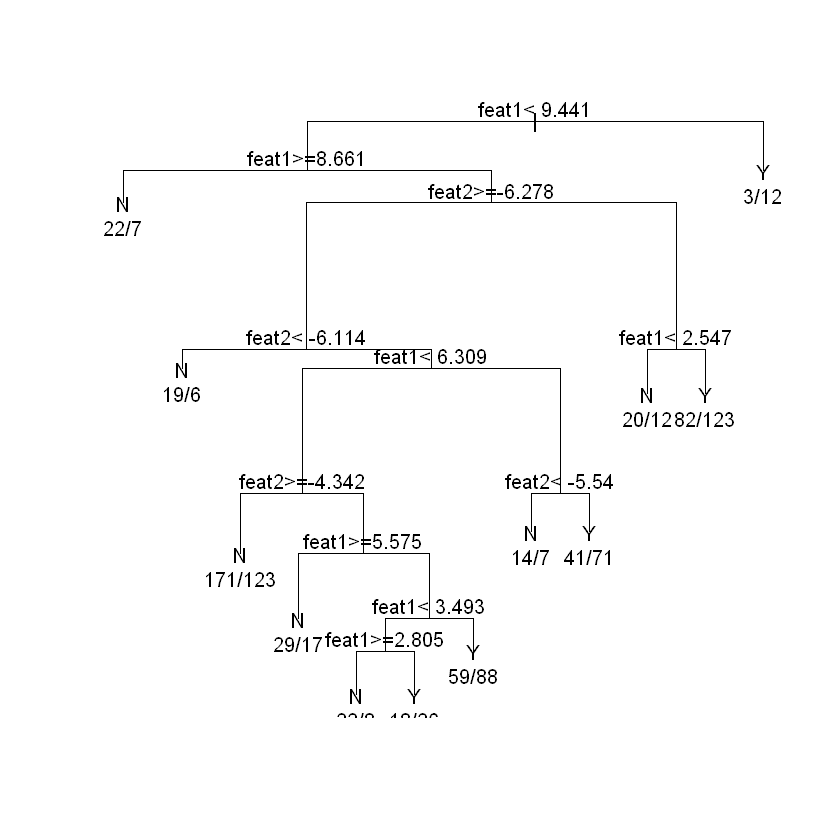

In [43]:
fit <- rpart(label ~ feat1 + feat2, data = bin.data)
plot(fit)
text(fit, use.n = TRUE)

The threshold value for the feature in the first split is given by 9.441.

In [50]:
frame <- fit$frame
# compute gini index for each node
frame[['gini']] <- 1 - (frame[['dev']] / frame[['n']])^2 - (1 - frame[['dev']] / frame[['n']])^2
# compute gini entropy for each node
frame[['entropy']] <- - (frame[['dev']] / frame[['n']]) * log2(frame[['dev']] / frame[['n']]) - (1 - frame[['dev']] / frame[['n']]) * log2(1 - frame[['dev']] / frame[['n']])
frame[frame$var != '<leaf>',][,c('var','n','dev','gini','entropy')]

,var,n,dev,gini,entropy
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,feat1,1000,500,0.5000000,1.0000000
2,feat1,985,488,0.4999583,0.9999398
5,feat2,956,475,0.4999803,0.9999716
10,feat2,719,346,0.4992949,0.9989825
21,feat1,694,340,0.4997965,0.9997064
42,feat2,561,262,0.4978251,0.9968599
85,feat1,267,128,0.4991513,0.9987753
171,feat1,221,99,0.4945845,0.9921729
342,feat1,74,34,0.4967129,0.9952525


There are 11 nodes in total. The gini index for each node is around 0.5, and the entropy is close to 1.

#### Distribution with (1,2) and (-1,2)

In [51]:
feat1 <- rnorm(1000, 1, 2)
feat2 <- rnorm(1000, -1, 2)
label <- c(rep('Y', 500), rep('N', 500))
bin.data <- data.frame(feat1 = feat1, feat2 = feat2, class=label)

In [53]:
fit <- rpart(label ~ feat1 + feat2, data = bin.data)
frame <- fit$frame
# compute gini index for each node
frame[['gini']] <- 1 - (frame[['dev']] / frame[['n']])^2 - (1 - frame[['dev']] / frame[['n']])^2
# compute gini entropy for each node
frame[['entropy']] <- - (frame[['dev']] / frame[['n']]) * log2(frame[['dev']] / frame[['n']]) - (1 - frame[['dev']] / frame[['n']]) * log2(1 - frame[['dev']] / frame[['n']])
frame[frame$var != '<leaf>',][,c('var','n','dev','gini','entropy')]

,var,n,dev,gini,entropy
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,feat1,1000,500,0.5000000,1.0000000
2,feat1,992,492,0.4999675,0.9999531
5,feat1,967,482,0.4999952,0.9999931
11,feat1,956,473,0.4999453,0.9999211
22,feat1,940,469,0.4999977,0.9999967
44,feat2,750,364,0.4995698,0.9993792
88,feat2,588,274,0.4976861,0.9966592


There are 7 nodes of the tree. The nodes are less given that the mean of the distribution is closer to 0.

In [61]:
prune.fit <- rpart(label ~ feat1 + feat2, data = bin.data, cp=0.1)
summary(prune.fit)

Call:
rpart(formula = label ~ feat1 + feat2, data = bin.data, cp = 0.1)
  n= 1000 

     CP nsplit rel error xerror xstd
1 0.016      0         1      0    0

Node number 1: 1000 observations
  predicted class=N  expected loss=0.5  P(node) =1
    class counts:   500   500
   probabilities: 0.500 0.500 



The pruned tree only has one node without any split.